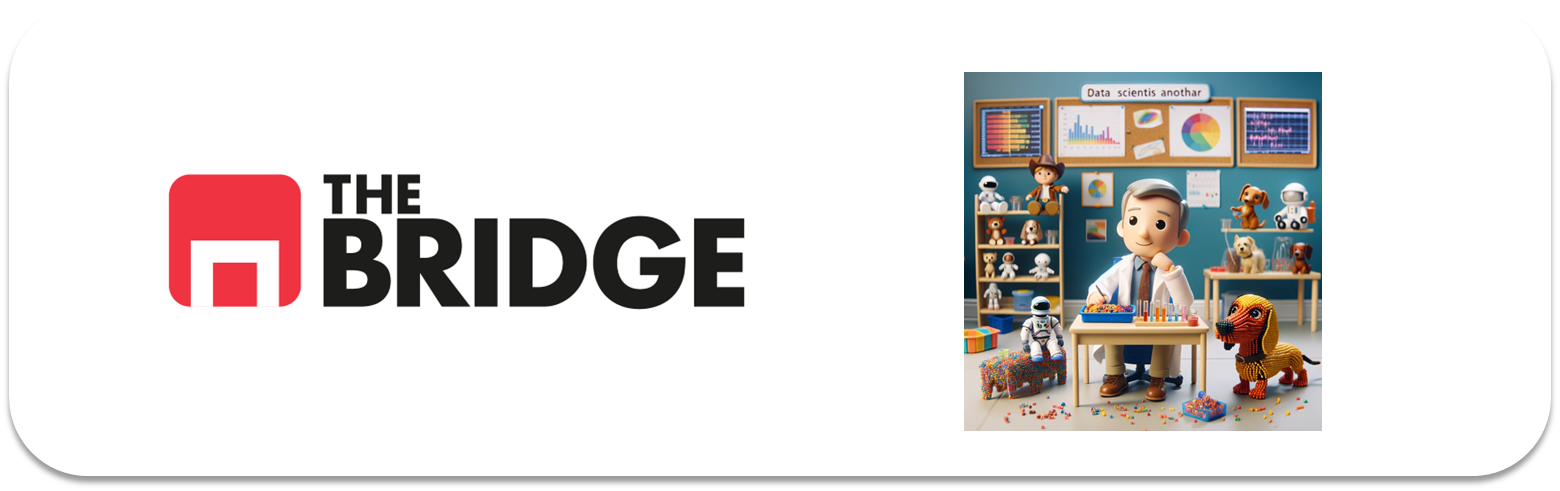

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Hay nulos en:
- age
- embarked
- deck
- embark_town

In [24]:
#para emarked ponemos la primera letra de la ciudad de embark_town
df_titanic.loc[df_titanic.embarked.isna(), "embarked"] = df_titanic.loc[df_titanic.embarked.isna(), "embark_town"].str[0]
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Hay nulos en:
- age
- embarked
- deck
- embark_town

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [13]:
df_titanic.isna().mean() * 100


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [14]:
df_titanic.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [15]:
df_titanic.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [17]:
#uso la media de edad para who

media = df_titanic.groupby("who")["age"].mean()
media

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [19]:
df_titanic["age"] = df_titanic["age"].fillna(df_titanic["who"].map(media))
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
df_titanic.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [22]:
df_titanic.loc[df_titanic.embark_town.isna(),"embark_town"] = df_titanic.embark_town.mode()[0]
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [39]:
#quito la columna de parch y también la de deck que tiene muchos nulos

df_titanic = df_titanic.drop(["parch","deck"], axis = 1, inplace = True)


KeyError: "['parch', 'deck'] not found in axis"

In [40]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [41]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,32.0,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True




| Columna/Variable | Descripción |
| ---------------- | ----------- |
|survived      | Si sobrevivió el pasajero siendo 1 para indicar que sí y 0 para indicar que no|
|pclass        | indica a la clase de pasaje que tiene el pasajero con numeros (1,2,3) |
|sex           | el genero del pasajero |
|age           | edad del pasajero|
|sibsp         | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)| 
|fare          | Tarifa del pasaje |
|embarked      | la inicial de la ciudad donde embarcó el pasajero: S,C,Q|
|class         | indica a la clase de pasaje que tiene el pasajero (primera, segunda o tercera) |
|who           | categoria del pasajero (women, man o child)|
|adult_male    | indica si el pasajero es un adulto hombre (True = si y false = no)|
|embark_town   | ciudad donde embarco: Southampton,Cherbourg, Queenstown|
|alive         | si esta vivo (yes = vivo y no = fallecido)|
|alone         | si el pasajero viaja solo (True = si, False = no)



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [42]:
# son las mencionadas en el dataset y ya lo habia hecho en el ejercicio anterior

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [43]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


In [44]:
from bootcampviztools import pinta_distribucion_categoricas, plot_combined_graphs

In [49]:
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    # Inicializamos una lista vacía para guardar los resultados
    results = []
    
    # Iteramos sobre cada columna del DataFrame
    for column in df_in.columns:
        # Contamos el número de valores únicos (cardinalidad) en la columna
        cardinalidad = df_in[column].nunique()
        
        # Calculamos el porcentaje de cardinalidad (valores únicos / total de filas)
        porcentaje_cardinalidad = cardinalidad / len(df_in) * 100
        
        # Inicializamos la clasificación como "Desconocida" por defecto
        categoria = ''
        
        # Asignamos categorías según las reglas definidas
        if cardinalidad == 2:
            categoria = "Binaria"
        elif cardinalidad < umbral_categoria:
            categoria = "Categórica"
        else:
            if porcentaje_cardinalidad >= umbral_continua:
                categoria = "Numérica Continua"
            else:
                categoria = "Numérica Discreta"
        # Guardamos los resultados en la lista
        results.append({
            'Columna': column,
            'Cardinalidad': cardinalidad,
            'Porcentaje Cardinalidad (%)': porcentaje_cardinalidad,
            'Tipo de Columna': categoria
        })
    
    # Convertimos los resultados en un DataFrame para devolver
    result_df = pd.DataFrame(results)
    
    return result_df
        

In [51]:
cardinalidad(df_titanic,10,30)

,Columna,Cardinalidad,Porcentaje Cardinalidad (%),Tipo de Columna
0,survived,2,0.224467,Binaria
1,pclass,3,0.336700,Categórica
2,sex,2,0.224467,Binaria
3,age,89,9.988777,Numérica Discreta
4,sibsp,7,0.785634,Categórica
5,fare,248,27.833895,Numérica Discreta
6,embarked,3,0.336700,Categórica
7,class,3,0.336700,Categórica
8,who,3,0.336700,Categórica
9,adult_male,2,0.224467,Binaria


In [46]:
categoricas = ["survived","who","class","embarked","alone"]
numericas = ["age","fare"]

### #2.1 Categóricas

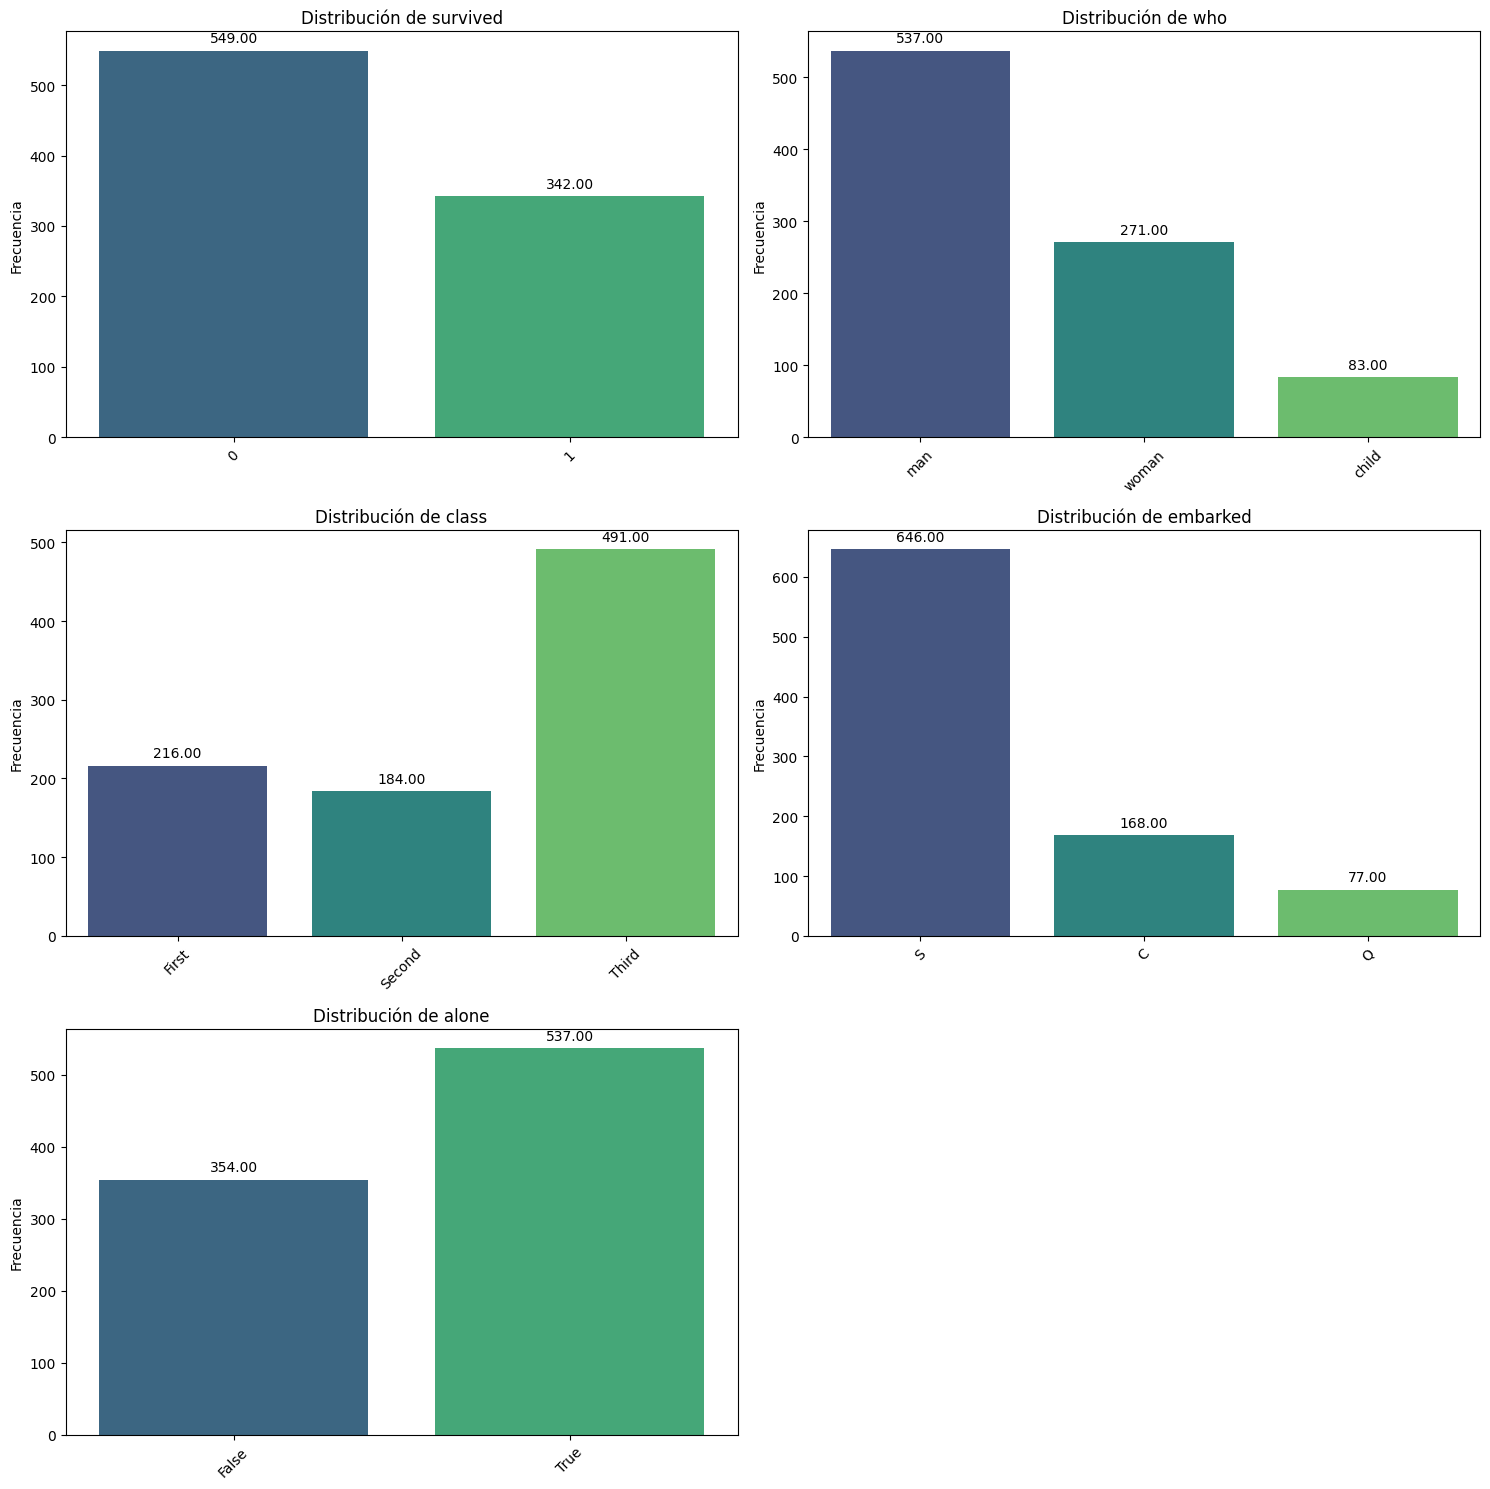

In [47]:
pinta_distribucion_categoricas(df_titanic, categoricas, mostrar_valores= True)

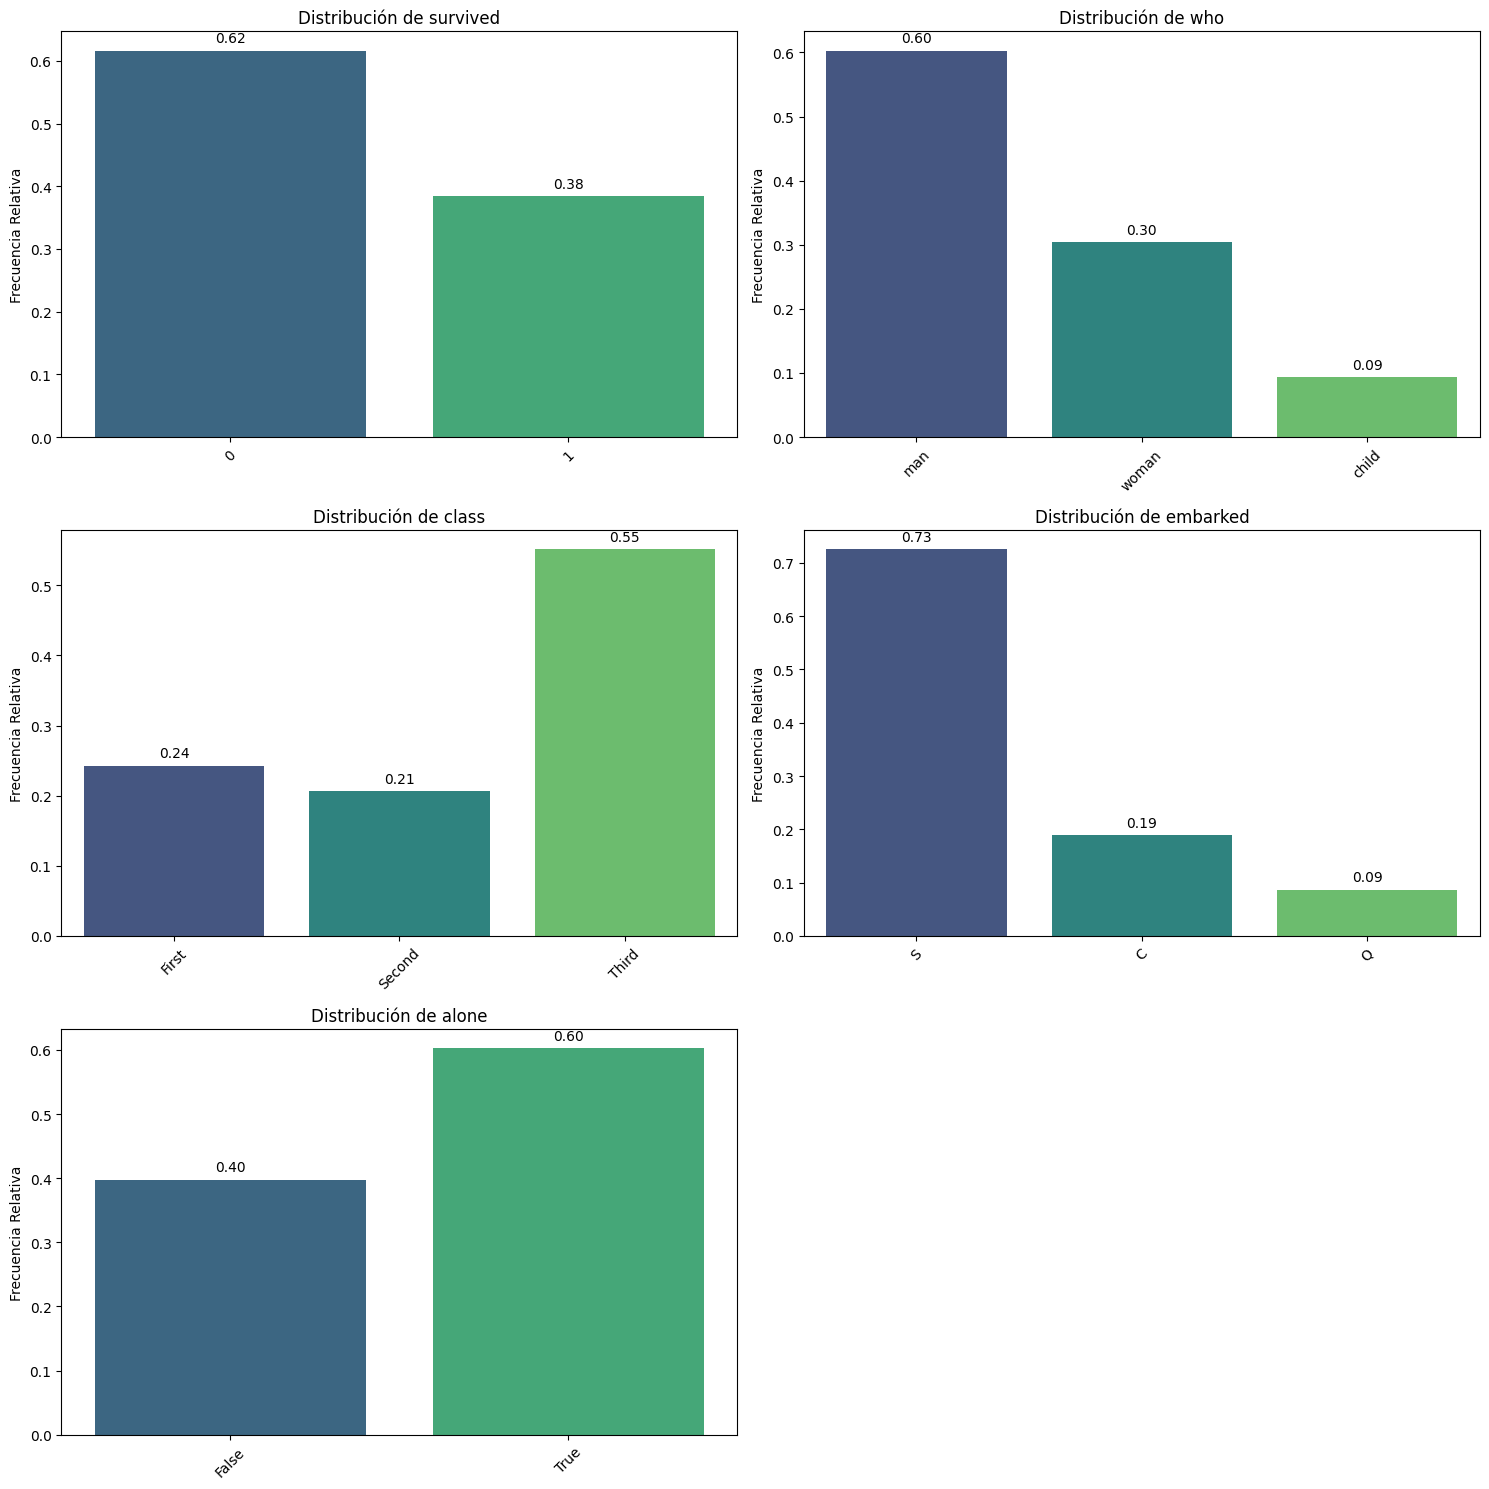

In [57]:
pinta_distribucion_categoricas(df_titanic, categoricas,relativa= True, mostrar_valores= True)

**survived:**

Segun el grafico de supervivencia, podemos ver que mas de la mitad fallecieron(62%) respecto a los que si lograron sobrevivir al hundicimento del Titanic. 

**who**

Esta variable indica los grupos de pasajeros. Vemos, segun el grafico, que la mayoría de los pasajeros eran hombres (60%) comparando con mujeres y niños (40%). Podríamos ver si hay una correlación con survived. 

**Class**
La mayor parte de viajeros era de tercera clase (55%). Estaría bien saber cuantos de estos fueron los que sobrevivieron.

**Embarked**

Los pasajeros provenian sobretodo de la ciudad de Southampton (73%). No veo que sea una variable importante o que tenga correlación alguna con el genero o si sobrevivió. Podriamos ver cuanta gente de esta población pertenece a que clase de pasaje.

**Alone**
El 60% de los pasajeros viajaba solo. Podriamos intuir que los niños iran en el 40% de los que no viajaban solos y seguramente con sus madres.



### #2.2 Numéricas

In [48]:
df_titanic[["age","fare"]].describe()

,age,fare
count,891.000000,891.000000
mean,30.319458,32.204208
std,13.063839,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,32.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


(2, 2)


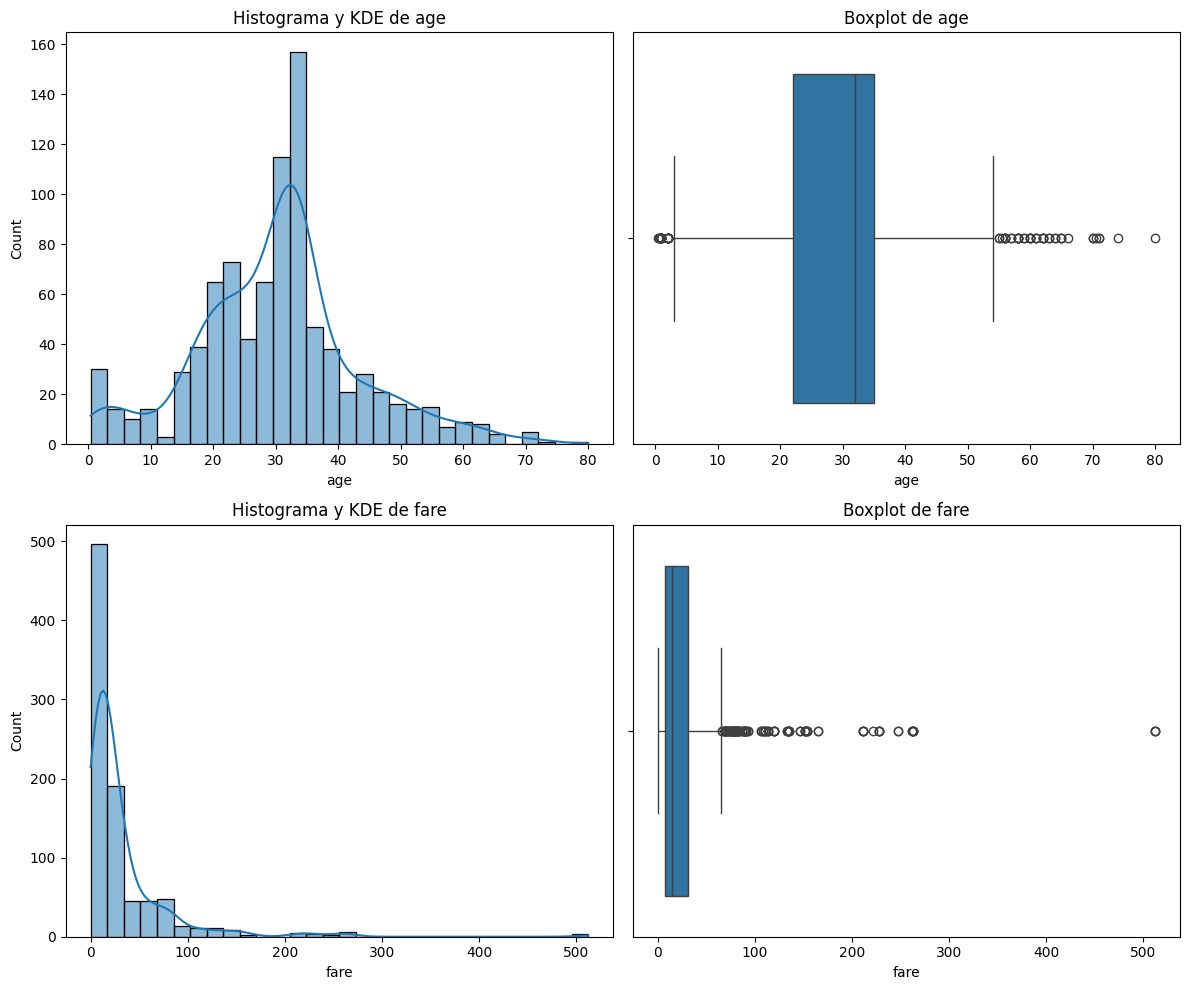

In [56]:
plot_combined_graphs(df_titanic, ["age","fare"],whisker_width=1.5, bins = 30)